Questions

    How many responders are there? Are there any missing values in any of the variables?
    What is the lowest salary and highest salary in the group?
    What is the mean salary for the sample? Include the standard error of the mean.
    What is the standard deviation for the years worked?
    What is the median salary for the sample?
    What is the interquartile range for salary in the sample?
    How many men are there in the sample? How many women are there in the sample? Present this information in a table.
    How many women are executives compared to men?
    Create a histogram for the variable Salary.
    Examine the histogram and describe the distribution for Salary.
    Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?
    Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).
        What is the relationship between Years Worked and Salary?
        Describe any patterns in the scatterplot.
        Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)
    Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.
        Interpret the size and direction of the correlation statistic.
        Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.


In [202]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [203]:
data_salary = pd.read_csv('salary.csv')

In [204]:
data_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [205]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [206]:
print(f'The number of entries is {len(data_salary)}')

The number of entries is 514


In [207]:
data_salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

From the data_salary dataset, only the salary column has one missing value.

In [208]:
minimum_salary = data_salary.salary.min()
maximum_salarry = data_salary.salary.max()
print(f'The lowest salary in the dataset is {minimum_salary} . The highest salary in the dataset is {maximum_salarry}')

The lowest salary in the dataset is 29000.0 . The highest salary in the dataset is 96156.0


In [209]:
data_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [210]:
mean_salary = data_salary.salary.mean()
print(f'The mean of the salary column is {mean_salary}')

The mean of the salary column is 50863.22009783625


In [211]:
data_salary["salary"].fillna(mean, inplace = True) 

In [212]:
from scipy.stats import sem

std_mean_err = sem(data_salary.salary)
print(f'The standard mean error of the salary column is {std_mean_err}')

The standard mean error of the salary column is 558.9715980665014


In [213]:
std_dev = data_salary.yearsworked.std()
print(f'The standard deviation of the yearsworked column is {std_dev}')

The standard deviation of the yearsworked column is 9.444695144169803


In [214]:
median_salary = data_salary.loc[:,'salary'].median()
print(f'the median of the salary column is {median_salary}')

the median of the salary column is 50165.5


In [215]:
Q1 = data_salary.salary.quantile(0.25)  
Q3 = data_salary.salary.quantile(0.75) 
 
IQR = Q3 - Q1 
print(f'The Interquantile range for the salary column is {IQR}')

The Interquantile range for the salary column is 20306.25


In [216]:
men = len(data_salary[data_salary.male == 1])
print(f'The number of men in the male column are {men}')

The number of men in the male column are 386


In [217]:
women = len(data_salary[data_salary.male == 0])
print(f' The number of women in the male column is {women}')

 The number of women in the male column is 128


In [218]:
gender_table = data_salary.male.value_counts()
print(gender_table)

1    386
0    128
Name: male, dtype: int64


In [219]:
executives = len(data_salary[data_salary.position == 3])
print(executives)

211


In [220]:
executive_men = len(data_salary[(data_salary.male == 1)&(data_salary.position == 3)])
print(executive_men)

192


In [221]:
executive_women = len(data_salary[(data_salary.male == 0)&(data_salary.position == 3)])
print(executive_women)

19


(array([ 63., 102.,  82.,  83.,  87.,  56.,  28.,   7.,   2.,   4.]), array([29000. , 35715.6, 42431.2, 49146.8, 55862.4, 62578. , 69293.6,
       76009.2, 82724.8, 89440.4, 96156. ]), <a list of 10 Patch objects>)


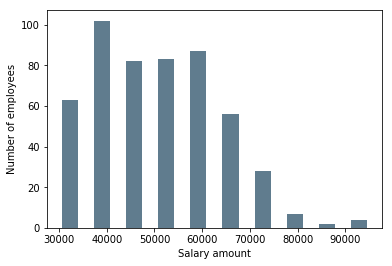

In [256]:
Salary = plt.hist(data_salary.salary, bins=10, rwidth=0.5, color='#607c8e')

plt.xlabel('Salary amount')
plt.ylabel('Number of employees')

print(Salary)

In [263]:

plt.bar(x=data_salary.male, y=data_salary.salary, data=data_salary, height=tight)


NameError: name 'tight' is not defined

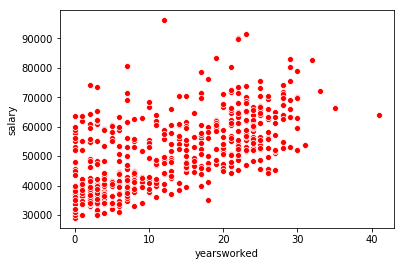

In [166]:
sns.scatterplot(x="yearsworked",y="salary", data=data_salary, color="red" )